In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Load Dataset
csv_path = "../data/e3bd3035f88e55fa_MOHANAD_A4706/data/NF-UQ-NIDS.csv"
data = pd.read_csv(csv_path)

# Step 2: Select Relevant Features
selected_features = [
    "IN_BYTES", "OUT_BYTES", "IN_PKTS", "OUT_PKTS", 
    "TCP_FLAGS", "FLOW_DURATION_MILLISECONDS", "Label"
]
data = data[selected_features]

# Step 3: Handle Missing Values
data = data.dropna()

# Step 4: Normalize Features
def normalize_minus_one_to_one(df, columns):
    # Create a copy of the dataframe
    normalized_df = df.copy()
    
    # Use MinMaxScaler to transform to [-1, 1]
    min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
    
    # Fit and transform the specified columns
    normalized_columns = min_max_scaler.fit_transform(df[columns])
    
    # Replace the columns in the dataframe
    normalized_df[columns] = normalized_columns
    
    return normalized_df, min_max_scaler

# Normalize features
features_to_normalize = [col for col in data.columns if col != "Label"]
data, scaler = normalize_minus_one_to_one(data, features_to_normalize)

# Verification
print("\nNormalized features details:")
for feature in features_to_normalize:
    print(f"{feature}:")
    print("  Min:", data[feature].min())
    print("  Max:", data[feature].max())
    print("  Mean:", data[feature].mean())
    print("  Standard Deviation:", data[feature].std())
    print()

# Save Preprocessed Data
preprocessed_filename = "../data/pre_processed/preprocessed_nf_uq_nids_haaa.csv"
data.to_csv(preprocessed_filename, index=False)
print(f"Preprocessed data saved as {preprocessed_filename}")

# Sample of processed data
print("\nSample of processed data:")
print(data.head())


Normalized features details:
IN_BYTES:
  Min: -1.0
  Max: 0.9999999999999998
  Mean: -0.9999650892429427
  Standard Deviation: 0.001456691587323448

OUT_BYTES:
  Min: -1.0
  Max: 1.0
  Mean: -0.9999219680890346
  Standard Deviation: 0.0024122585460325152

IN_PKTS:
  Min: -1.0
  Max: 1.0
  Mean: -0.999941646970273
  Standard Deviation: 0.003115363803918613

OUT_PKTS:
  Min: -1.0
  Max: 0.9999999999999998
  Mean: -0.9999814441996424
  Standard Deviation: 0.0007698215421739803

TCP_FLAGS:
  Min: -1.0
  Max: 1.0
  Mean: -0.5429929740363992
  Standard Deviation: 0.6935968871360025

FLOW_DURATION_MILLISECONDS:
  Min: -1.0
  Max: 1.0
  Mean: 0.007425125459183499
  Standard Deviation: 0.9976828530681369

Preprocessed data saved as ../data/pre_processed/preprocessed_nf_uq_nids_haaa.csv

Sample of processed data:
   IN_BYTES  OUT_BYTES   IN_PKTS  OUT_PKTS  TCP_FLAGS  \
0 -0.999915  -0.999997 -0.999982 -0.999988  -0.775785   
1 -0.999984  -0.999999 -0.999990 -0.999997  -0.775785   
2 -0.999984  

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed dataset
preprocessed_filename = "../data/pre_processed/preprocessed_nf_uq_nids_haaa.csv"
data = pd.read_csv(preprocessed_filename)

# Encode categorical labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Verify the unique labels
print("Unique labels:", label_encoder.classes_)

# Separate features and labels
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Print the unique labels and their corresponding encoded values
print("Label encoding mapping:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

# Filter only attack data for GAN training
attack_label = 1  # Assuming 1 represents "attack"
X_attack = X[y == attack_label]

Unique labels: [0 1]
Label encoding mapping:
0: 0
1: 1


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the preprocessed dataset
preprocessed_filename = "../data/pre_processed/preprocessed_nf_uq_nids_haaa.csv"
data = pd.read_csv(preprocessed_filename)

# Encode categorical labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Verify the unique labels
print("Unique labels:", label_encoder.classes_)

# Separate features and labels
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Print the unique labels and their corresponding encoded values
print("Label encoding mapping:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

# Filter only attack data for GAN training
attack_label = 1  # Assuming 1 represents "attack"
X_attack = X[y == attack_label]

# Normalize the attack data to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_attack = scaler.fit_transform(X_attack)

Unique labels: [0 1]
Label encoding mapping:
0: 0
1: 1


In [15]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the generator model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(output_dim, activation='tanh'))
    return model

# Define the critic model
def build_critic(input_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1))
    return model

# Build the generator and critic
input_dim = 100  # Dimension of the noise vector
output_dim = X_attack.shape[1]  # Number of features in the dataset
generator = build_generator(input_dim, output_dim)
critic = build_critic(output_dim)

/Users/sanjanathyady/Desktop/project-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
class WGAN(tf.keras.Model):
    def __init__(self, generator, critic, gp_weight=10.0):
        super(WGAN, self).__init__()
        self.generator = generator
        self.critic = critic
        self.gp_weight = gp_weight

    def compile(self, g_optimizer, c_optimizer, g_loss_fn, c_loss_fn):
        super(WGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.c_optimizer = c_optimizer
        self.g_loss_fn = g_loss_fn
        self.c_loss_fn = c_loss_fn

    def gradient_penalty(self, batch_size, real_data, fake_data):
        alpha = tf.random.normal([batch_size, 1], 0.0, 1.0)
        diff = fake_data - real_data
        interpolated = real_data + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            pred = self.critic(interpolated, training=True)

        grads = gp_tape.gradient(pred, [interpolated])[0]
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        for _ in range(5):
            noise = tf.random.normal([batch_size, input_dim])
            with tf.GradientTape() as c_tape:
                fake_data = self.generator(noise, training=True)
                real_output = self.critic(real_data, training=True)
                fake_output = self.critic(fake_data, training=True)
                c_loss = self.c_loss_fn(real_output, fake_output)
                gp = self.gradient_penalty(batch_size, real_data, fake_data)
                c_loss += gp * self.gp_weight

            c_grads = c_tape.gradient(c_loss, self.critic.trainable_variables)
            self.c_optimizer.apply_gradients(zip(c_grads, self.critic.trainable_variables))

        noise = tf.random.normal([batch_size, input_dim])
        with tf.GradientTape() as g_tape:
            fake_data = self.generator(noise, training=True)
            fake_output = self.critic(fake_data, training=True)
            g_loss = self.g_loss_fn(fake_output)

        g_grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_variables))

        return {"c_loss": c_loss, "g_loss": g_loss}

# Define the loss functions
def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output)

def critic_loss(real_output, fake_output):
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

# Instantiate the WGAN model
wgan = WGAN(generator, critic)

# Compile the WGAN model
wgan.compile(
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
    c_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
    g_loss_fn=generator_loss,
    c_loss_fn=critic_loss
)

Training Progress:   0%|          | 2/10000 [00:00<24:43,  6.74it/s]

Epoch: 0 - Models saved
Epoch: 0 - g_loss: -0.17163310945034027, c_loss: -0.29887911677360535


Training Progress:  10%|█         | 1002/10000 [02:18<20:50,  7.20it/s]

Epoch: 1000 - Models saved
Epoch: 1000 - g_loss: -0.3213610053062439, c_loss: -0.21182796359062195


Training Progress:  20%|██        | 2002/10000 [04:37<18:59,  7.02it/s]

Epoch: 2000 - Models saved
Epoch: 2000 - g_loss: -0.2794867157936096, c_loss: -0.15872853994369507


Training Progress:  30%|███       | 3002/10000 [06:54<16:20,  7.13it/s]

Epoch: 3000 - Models saved
Epoch: 3000 - g_loss: -0.6785202622413635, c_loss: -0.18880416452884674


Training Progress:  40%|████      | 4002/10000 [09:13<13:22,  7.47it/s]

Epoch: 4000 - Models saved
Epoch: 4000 - g_loss: -0.5824485421180725, c_loss: -0.2043652981519699


Training Progress:  50%|█████     | 5002/10000 [11:23<12:01,  6.92it/s]

Epoch: 5000 - Models saved
Epoch: 5000 - g_loss: -0.36491483449935913, c_loss: -0.17142266035079956


Training Progress:  60%|██████    | 6002/10000 [13:38<09:31,  7.00it/s]

Epoch: 6000 - Models saved
Epoch: 6000 - g_loss: -1.108485221862793, c_loss: -0.1489003449678421


Training Progress:  70%|███████   | 7002/10000 [15:54<06:56,  7.20it/s]

Epoch: 7000 - Models saved
Epoch: 7000 - g_loss: -1.281299352645874, c_loss: -0.16613397002220154


Training Progress:  80%|████████  | 8002/10000 [18:10<04:32,  7.34it/s]

Epoch: 8000 - Models saved
Epoch: 8000 - g_loss: -1.567115068435669, c_loss: -0.1259302794933319


Training Progress:  90%|█████████ | 9002/10000 [20:24<02:16,  7.29it/s]

Epoch: 9000 - Models saved
Epoch: 9000 - g_loss: -1.4376308917999268, c_loss: -0.12999986112117767


Training Progress: 100%|██████████| 10000/10000 [22:39<00:00,  7.36it/s]


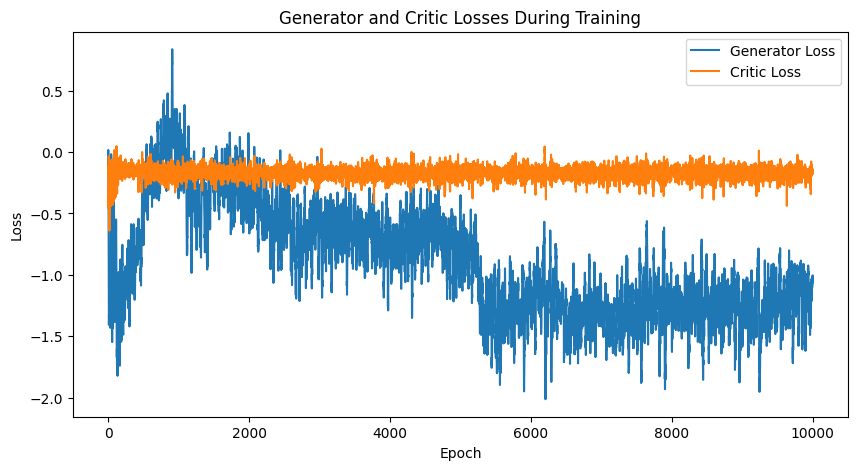

In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# Training parameters
epochs = 10
batch_size = 64
save_interval = 1000  # Save the model every 1000 epochs

# Lists to store losses
g_losses = []
c_losses = []

# Training loop with progress bar
for epoch in tqdm(range(epochs), desc="Training Progress"):
    idx = np.random.randint(0, X_attack.shape[0], batch_size)
    real_data = X_attack[idx]
    losses = wgan.train_step(real_data)
    
    # Store the losses
    g_losses.append(losses['g_loss'])
    c_losses.append(losses['c_loss'])

    if epoch % save_interval == 0:
        # Save the generator and critic models
        generator.save(f'generator_epoch_{epoch}.h5')
        critic.save(f'critic_epoch_{epoch}.h5')
        print(f"Epoch: {epoch} - Models saved")

    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} - g_loss: {losses['g_loss']}, c_loss: {losses['c_loss']}")

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label='Generator Loss')
plt.plot(c_losses, label='Critic Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Critic Losses During Training')
plt.show()

In [22]:
noise = np.random.normal(0, 1, (1000, 100))
generated_data = generator.predict(noise)

# Inverse transform to original scale
generated_data = scaler.inverse_transform(generated_data)

# Print the generated data
print(generated_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[-0.17602828 -0.19900507 -0.77602196 -0.9609295   0.17552584  0.19117926]
 [-0.27206904 -0.3318022  -0.7888015  -0.9532684   0.01287057  0.333454  ]
 [-0.24661228 -0.01418788 -0.77681994 -0.9586192  -0.05325079  0.5646955 ]
 ...
 [ 0.18776345 -0.19306044 -0.79936874 -0.9587785  -0.42100233  0.18594322]
 [ 0.04867445 -0.477964   -0.7493297  -0.96370584  0.16440375  0.7467761 ]
 [ 0.25404918 -0.45233938 -0.7725478  -0.9589488  -0.24840014  0.43887314]]


In [19]:
noise = np.random.normal(0, 1, (1000, 100))
noise

array([[-0.65626574,  0.83186747, -1.20108091, ..., -2.70793574,
         0.76399917,  0.07379519],
       [ 0.2044359 , -0.24473942,  0.41001805, ..., -0.41698396,
        -0.54653816, -0.8401619 ],
       [-0.12113637, -0.09265315, -0.5374366 , ...,  1.05970802,
         0.59469626, -1.80727038],
       ...,
       [ 0.22694557,  0.25055083, -0.58635138, ..., -0.33946221,
        -0.08895603,  1.07715063],
       [-0.23543292,  0.79644317,  0.55537063, ...,  1.52234934,
        -0.46368668, -1.12172097],
       [ 1.12040005,  0.82080698,  0.41936468, ..., -0.89070257,
        -0.91633152,  0.67686788]])

In [27]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the saved generator model

# Parameters
num_samples = 1000  # Number of samples to generate
noise_dim = 100  # Dimension of the noise vector

# Generate noise
noise = np.random.normal(0, 1, (num_samples, noise_dim))

# Generate synthetic attack data
synthetic_data = generator(noise, training=False)  # Directly call the generator model

# Inverse transform to original scale
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_attack)  # Assuming X_attack is the original attack data used for training
synthetic_data = scaler.inverse_transform(synthetic_data)

# Save the generated data to a CSV file
generated_data_df = pd.DataFrame(synthetic_data, columns=['IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS'])
generated_data_df.to_csv('generated_attack_data.csv', index=False)

print("Generated attack data saved to 'generated_attack_data.csv'")

Generated attack data saved to 'generated_attack_data.csv'


In [26]:

# Convert the generated data to a DataFrame
generated_df = pd.DataFrame(synthetic_data)

# Save the DataFrame to a CSV file
generated_df.to_csv('generated_attack_data.csv', index=False)

# Print the generated data
print(generated_data)

[[-0.17602828 -0.19900507 -0.77602196 -0.9609295   0.17552584  0.19117926]
 [-0.27206904 -0.3318022  -0.7888015  -0.9532684   0.01287057  0.333454  ]
 [-0.24661228 -0.01418788 -0.77681994 -0.9586192  -0.05325079  0.5646955 ]
 ...
 [ 0.18776345 -0.19306044 -0.79936874 -0.9587785  -0.42100233  0.18594322]
 [ 0.04867445 -0.477964   -0.7493297  -0.96370584  0.16440375  0.7467761 ]
 [ 0.25404918 -0.45233938 -0.7725478  -0.9589488  -0.24840014  0.43887314]]


In [28]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the preprocessed dataset to fit the scaler
preprocessed_filename = "../data/pre_processed/preprocessed_nf_uq_nids_haaa.csv"
data = pd.read_csv(preprocessed_filename)

# Encode categorical labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Separate features and labels
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Filter only attack data for GAN training
attack_label = 1  # Assuming 1 represents "attack"
X_attack = X[y == attack_label]

# Normalize the attack data to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_attack = scaler.fit_transform(X_attack)

# Load the saved generator model

# Parameters
num_samples = 1000  # Number of samples to generate
noise_dim = 100  # Dimension of the noise vector

# Generate noise
noise = np.random.normal(0, 1, (num_samples, noise_dim))

# Generate synthetic attack data
synthetic_data = generator(noise, training=False)  # Directly call the generator model

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Save the generated data to a CSV file
generated_data_df = pd.DataFrame(synthetic_data, columns=['IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS'])
generated_data_df.to_csv('generated_attack_data.csv', index=False)

print("Generated attack data saved to 'generated_attack_data.csv'")

Generated attack data saved to 'generated_attack_data.csv'


In [29]:
generator.save('generator.h5')

In [3]:
import tensorflow as tf
import numpy as np


In [4]:
generator = tf.keras.models.load_model('/Users/sanjanathyady/Desktop/project-2/models/ids/generator.h5')


In [8]:
# Parameters
from sklearn.preprocessing import MinMaxScaler

num_samples = 1000  # Number of samples to generate
noise_dim = 100  # Dimension of the noise vector

# Generate noise
noise = np.random.normal(0, 1, (num_samples, noise_dim))

# Generate synthetic attack data
synthetic_data = generator(noise, training=False) 

In [9]:
synthetic_data

<tf.Tensor: shape=(1000, 6), dtype=float32, numpy=
array([[-0.19299981, -0.21282403, -0.287265  , -0.13676944, -0.02671264,
         0.20016527],
       [-0.3030917 , -0.35902587, -0.4694474 , -0.03678836, -0.22776043,
         0.40976208],
       [-0.19860603, -0.21518709,  0.1222023 , -0.08327872, -0.07591113,
         0.11415283],
       ...,
       [-0.50945723, -0.2443253 , -0.04284663, -0.45203784,  0.00754227,
         0.58714306],
       [-0.20263049, -0.29473776, -0.19672394, -0.54135215, -0.17003618,
         0.692928  ],
       [ 0.04314157, -0.21050586,  0.09015071,  0.18408927, -0.25383794,
         0.14485992]], dtype=float32)>

In [11]:

# Inverse transform to original scale
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_attack)  # Assuming X_attack is the original attack data used for training
synthetic_data = scaler.inverse_transform(synthetic_data)

NameError: name 'X_attack' is not defined